#**Análise dos dados do AirBNB**#
##COPENHAGEN - DINAMARCA##

####Projeto do Curso Data Science na Prática, por George Vasconcelos####


O AirBNB é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem. lançado em 2008, com sede em San Francisco, Califórnia, é a maior plataforma de hospedagem do planeta, sem possuir nenhum hotel.

No final de 2019 anunciou IPO na bolsa de NY para 2020, com valor estimado de 31 bilhoes de dólares, porém, a pandemia pode afetar esse prazo.

Obtivemos os dados no site __Inside AirBNB (__http://insideairbnb.com/get-the-data.html__)__, que traz os dados de várias cidade do mundo.

Para esta análise, selecionamos a cidade de Copenhagen, capital e maior cidade da Dinamarca.
Situada nas ilhas de Zelandia e Amager, esta cidade de apenas 600.000 habitantes este país ao norte da Europa possui uma posição estratégica para o turismo por estar a poucas horas de diversas cidades turísticas, podendo servir de base para vários roteiros.

<img src="https://abrilviagemeturismo.files.wordpress.com/2016/12/115942153reduzido-6i.jpg?quality=70&strip=info&w=680&h=453&crop=1" alt="Castelo_Rosenborg" >

In [0]:
#importando as bibliotecas necessárias a esta análise:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#importando os dados:
df = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2020-04-28/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68798,12.54571,Private room,374,2,168,2019-07-19,1.29,1,61
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69163,12.57459,Entire home/apt,2399,3,50,2019-12-14,0.64,1,348
2,26473,City Centre Townhouse Sleeps 1-12 persons,112210,Oliver,NaN,Indre By,55.67590,12.57698,Entire home/apt,3099,3,293,2020-03-02,2.52,1,161
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.67069,12.55430,Entire home/apt,798,7,22,2019-08-02,0.18,1,8
4,29618,Artsy and familyfriendly home in lovely Copenh...,127577,Simon And Anna,NaN,sterbro,55.69375,12.56945,Entire home/apt,856,7,90,2017-06-03,0.76,1,0


##**Análise dos dados**##
Os dados estão distribuídos em 28.187 linhas e 16 colunas, se tratando, portanto de um dataframe relevante para esta análise. A seguir faremos uma avaliação da qualidade dos dados e procederemos com a "limpeza" das informações, retirando linhas e colunas incorretas e desnecessárias, bem como excluindo outliers que distorcem as informações.

In [41]:
df.describe

<bound method NDFrame.describe of              id  ... availability_365
0          6983  ...               61
1         26057  ...              348
2         26473  ...              161
3         29118  ...                8
4         29618  ...                0
...         ...  ...              ...
28182  43289334  ...               77
28183  43289652  ...               87
28184  43299462  ...              363
28185  43300059  ...              100
28186  43301400  ...              243

[28187 rows x 16 columns]>

##Dicionário de variáveis##

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).
Podemos observar que as variáveis numéricas estão corretamente importadas como *int64* ou *float64* e as variáveis strings como *object*, não havendo variáveis *booleanas*.

Os nomes das colunas também estão adequados, sem ponto, espaços em branco ou caracteres especiais.

Não há, portanto necessidade de intervenção nestes aspectos do dataframe.

In [42]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes?**###
A qualidade do Dataset é inversamente proporcional à quantidade de valores ausentes.
Para identificar as ausências, rodamos a função *isnull* e somamos (1) presentes e (0) para ausentes:

com isso, observamos que temos 5 colunas com valores ausentes:
*   Name
*   Host name
*   Neighbourhood_group
*   Last Review
*   Review per month


In [43]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.163302
last_review                       0.163302
name                              0.002058
host_name                         0.000426
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Observamos que a variável "neighbourhood_group" posssui 100% dos dados faltantes, enquanto que "reviews_per_month" e "last_review" tem 16,33% dos dados em branco. 
"name" e "host_name" tem perda insignificante. Vamos, assim, excluir a coluna em branco e as linhas com *name* e *host_name* em branco. As linhas com *review_per_month* e *last_review* serão mantidas pois tem alta representatividade (16,33%) e não influenciam as análises subsequentes.

In [0]:
#excluindo a coluna neighbourhood_group:
#o parâmetro inplace = True indica que as alterações foram feitas no dataset original. 
df.drop('neighbourhood_group', inplace=True, axis=1)

In [45]:
#vamos excluir as linhas que não possuem dados em *name* e *host_name:
df.dropna(axis=0, thresh=None, subset=['name','host_name'], inplace=True)
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.162571
last_review                       0.162571
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

##**Q3. Qual o tipo de distribuição das variáveis?**##
Uma excelente forma de observar a distribuição das variáveis e detectar outliers é através do histograma:

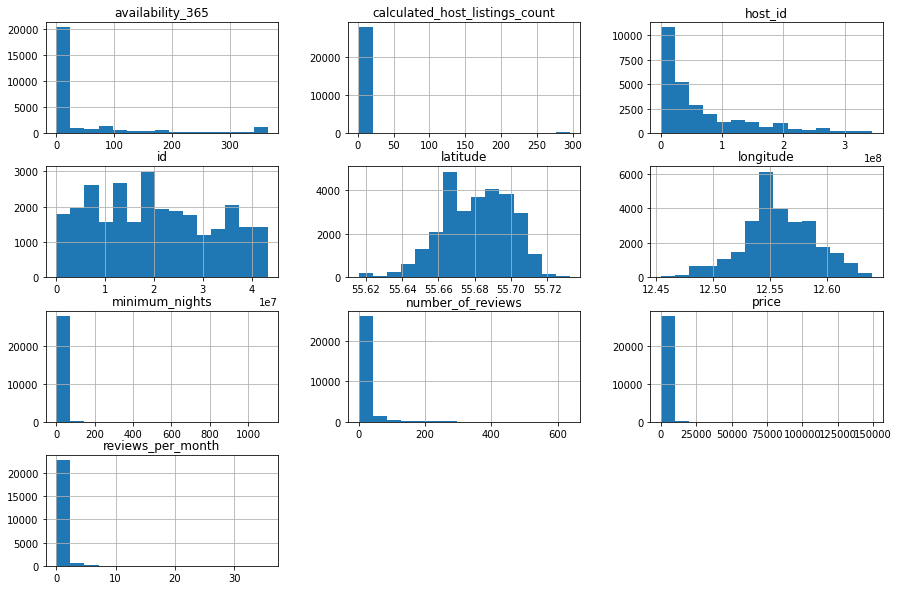

In [46]:
#Bins significa a quantidade de barras e figsize o tamanho.
df.hist(bins=15, figsize=(15,10));

##**Q4. há outliers presentes?**##
Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [47]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,28117.000000,28117.000000,28117.000000,23546.000000,28117.000000,28117.000000
mean,875.612121,3.722054,13.916350,0.559620,4.871074,46.930931
std,2249.867033,15.024922,27.577633,0.833709,30.606758,94.708859
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,502.000000,2.000000,1.000000,0.130000,1.000000,0.000000
50%,702.000000,3.000000,6.000000,0.320000,1.000000,0.000000
75%,997.000000,4.000000,15.000000,0.670000,1.000000,39.000000
max,149219.000000,1100.000000,637.000000,35.620000,296.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 997, porém seu valor máximo é 149.219.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

Boxplot para Noites:

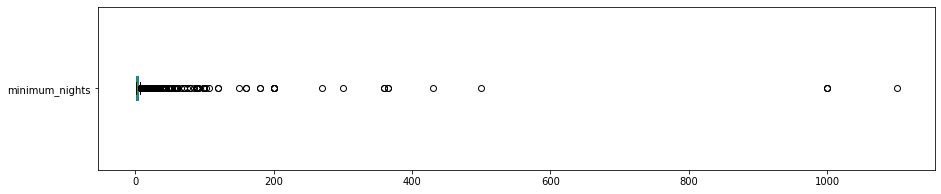

minimum_nights: valores acima de 30:
134 entradas
0.4766%


In [48]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para preço:

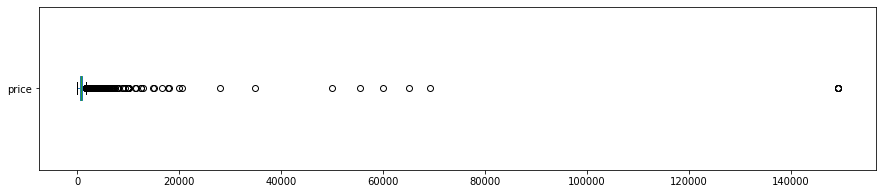


price: valores acima de 1500
1788 entradas
6.3591%


In [49]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

No boxplot se vê claramente a existência de permanência mínima acima de 1000 noites e valores acima de 140.000, se tratando claramente de outliers.Vamos, então removê-los:

Histograma sem outliers:

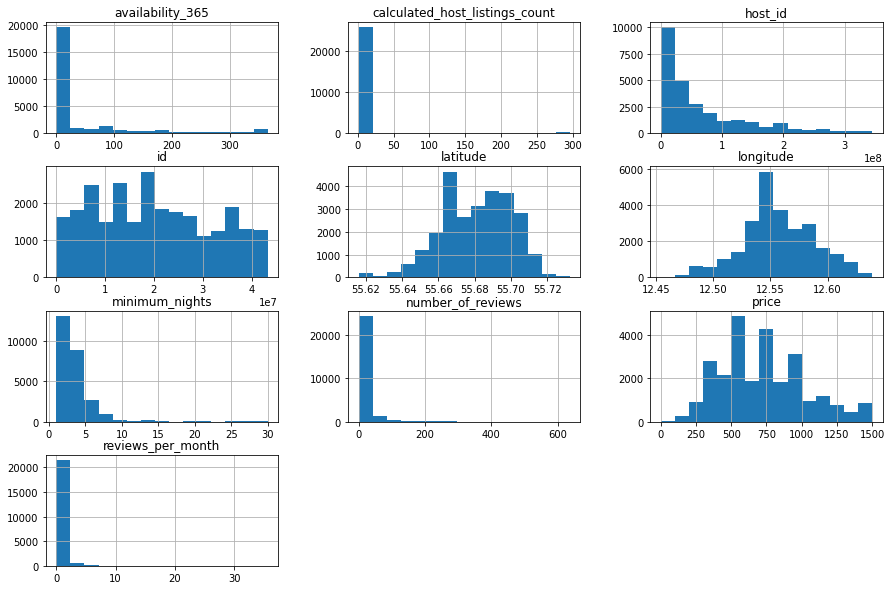

In [51]:
# criar uma cópia do dataframe remover os *outliers*
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe um impacto **mútuo** entre duas variáveis, ou seja, uma variável influencia na outra e vice-versa.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [52]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008922,-0.021063,-0.033092,0.128752,0.154878
minimum_nights,-0.008922,1.000000,-0.070177,-0.122977,-0.072644,0.040246
number_of_reviews,-0.021063,-0.070177,1.000000,0.693755,-0.048654,0.212624
reviews_per_month,-0.033092,-0.122977,0.693755,1.000000,-0.014664,0.209127
calculated_host_listings_count,0.128752,-0.072644,-0.048654,-0.014664,1.000000,0.102537
availability_365,0.154878,0.040246,0.212624,0.209127,0.102537,1.000000


#Coeficiente de Correlação de Pearson
O **coeficiente de correlação de Pearson (r)**, também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1, onde a correlação que se aproxima de 1, indica um aumento no valor de uma variável quando a outra também aumenta, enquanto que ao se aproximar de -1, quando o valor de uma variável aumenta o da outra diminui. 

###*Em qualquer dos casos, a correlação existe.*

Um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou  -1, mais forte é a relação.

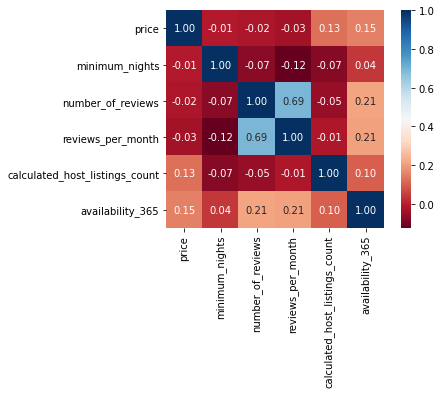

In [53]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

No caso acima, observamos que a maior correlação entre variáveis diferentes se refere a "reviews_per_month" e "number_of_reviews", o que seria natural e não nos traz nenhum insight.
Porém podemos observar uma razoável correlação entre "availability_365" e os reviews, o que indica que os imóveis que tem maior disponibilidade tem maior quantidade de avaliações, e, consequentemente, foram mais vezes alugados.

## **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [54]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    21835
Private room        4273
Shared room           77
Hotel room            21
Name: room_type, dtype: int64

In [55]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    83.320614
Private room       16.305426
Shared room         0.293826
Hotel room          0.080134
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Copenhagen?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [56]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Indre By                     902.076146
Amager Vest                  766.881221
Vesterbro-Kongens Enghave    760.158034
Frederiksberg                748.855667
sterbro                      733.870317
Nrrebro                      673.248745
Amager st                    663.651303
Brnshj-Husum                 647.675781
Valby                        632.975277
Vanlse                       604.630435
Name: price, dtype: float64

Observamos que o bairro de "Indre By" tem o maior preço. Porém para saber se a amostra é relevante, vamos listar a quantidade de imóveis por bairro. Neste caso vemos que o número é bastante considerável (2.974), o que indica que se trata de um bairro realmente valorizado.

In [0]:
# mostrar a quantidade de imóveis disponíveis por bairro
df_clean.neighbourhood.value_counts();

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

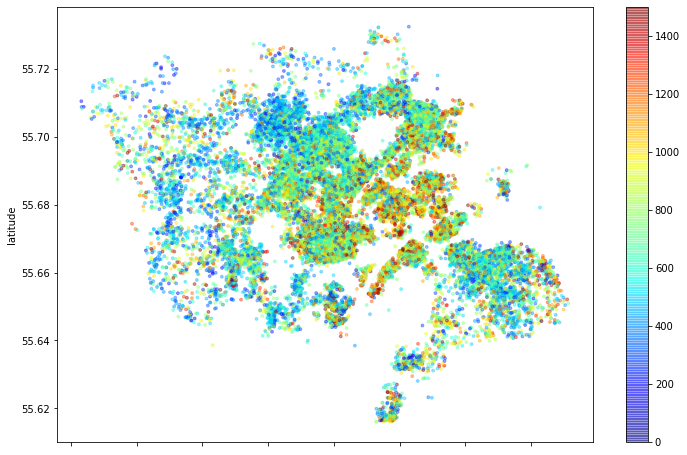

In [58]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Pode-se perceber que existe uma boa distribuição de imóveis entre os bairros, com destaque de valor para o bairro de "Indre By", em média, cerca de 25% mais caro que a média sem os outliers de preço (724,53). Esta alta era esperada, visto que se trata do bairro central, ao lado dos principais pontos de interesse. Bairros mais baratos, como o décimo colocado *Vanlse* ficam mais distantes do centro e precisam de transporte, o que deve ser considerado pelo viajante.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.